# **Parkinsons Dataset**

*Import the Libraries to process and Model the data.*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from scipy.stats import norm

**Loading the Data set and Summarizing the data by visualization**

In [2]:
data= pd.read_csv('parkinsons.data')

In [3]:
data.shape
data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [5]:
target = data.pop('status')
data['status'] = target

*Moving the target Column to the last in the dataset*

In [6]:
data.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
status              0
dtype: int64

In [7]:
data.nunique()

name                195
MDVP:Fo(Hz)         195
MDVP:Fhi(Hz)        195
MDVP:Flo(Hz)        195
MDVP:Jitter(%)      173
MDVP:Jitter(Abs)     19
MDVP:RAP            155
MDVP:PPQ            165
Jitter:DDP          180
MDVP:Shimmer        188
MDVP:Shimmer(dB)    149
Shimmer:APQ3        184
Shimmer:APQ5        189
MDVP:APQ            189
Shimmer:DDA         189
NHR                 185
HNR                 195
RPDE                195
DFA                 195
spread1             195
spread2             194
D2                  195
PPE                 195
status                2
dtype: int64

In [8]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


*Basic stats of the data*

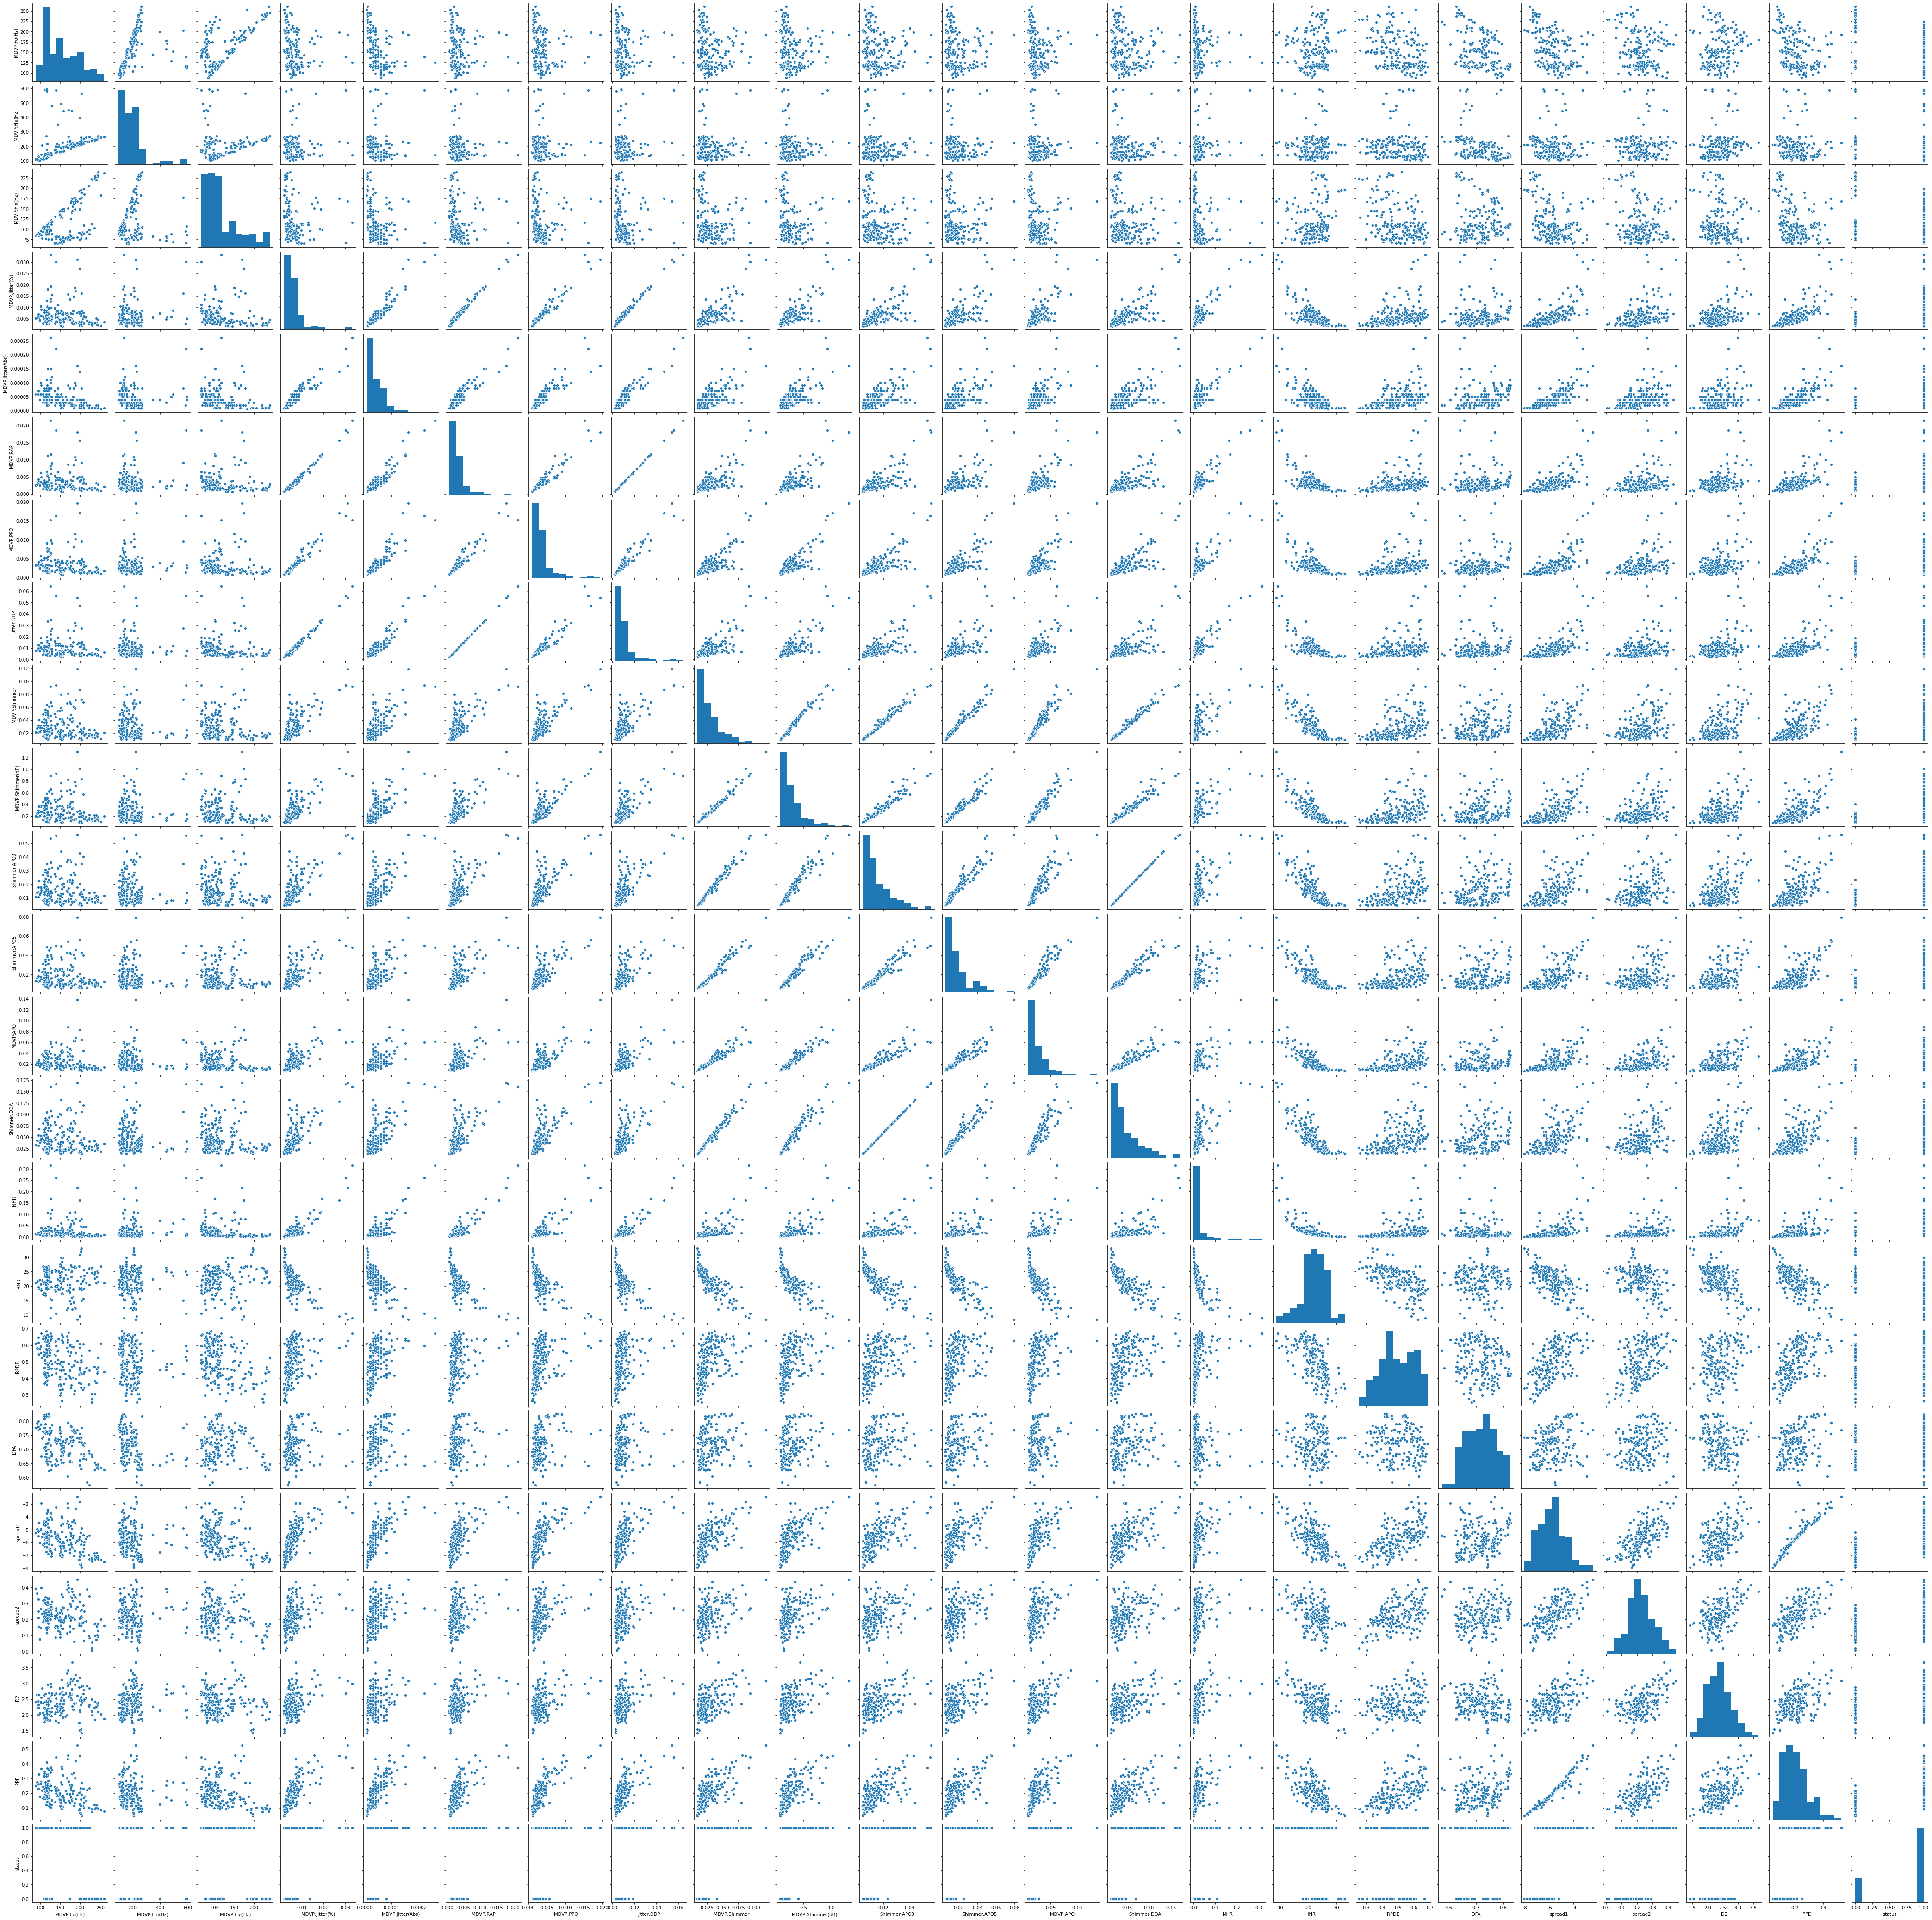

In [9]:
sns.pairplot(data = data)

*From the pairplot, we see there is high amount of postive correlation for few columns*

In [10]:
data.corr()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
MDVP:Fo(Hz),1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,...,-0.094732,-0.021981,0.059144,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356,-0.383535
MDVP:Fhi(Hz),0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,...,-0.003733,0.163766,-0.024893,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543,-0.166136
MDVP:Flo(Hz),0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,...,-0.150737,-0.108670,0.210851,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071,-0.380200
MDVP:Jitter(%),-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,...,0.746635,0.906959,-0.728165,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543,0.278220
MDVP:Jitter(Abs),-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,...,0.697170,0.834972,-0.656810,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162,0.338653
MDVP:RAP,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,...,0.744919,0.919521,-0.721543,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999,0.266668
MDVP:PPQ,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,...,0.763592,0.844604,-0.731510,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647,0.288698
Jitter:DDP,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,...,0.744901,0.919548,-0.721494,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005,0.266646
MDVP:Shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,...,0.987626,0.722194,-0.835271,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771,0.367430
MDVP:Shimmer(dB),-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,...,0.963202,0.744477,-0.827805,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058,0.350697


*Correlation analysis of data*

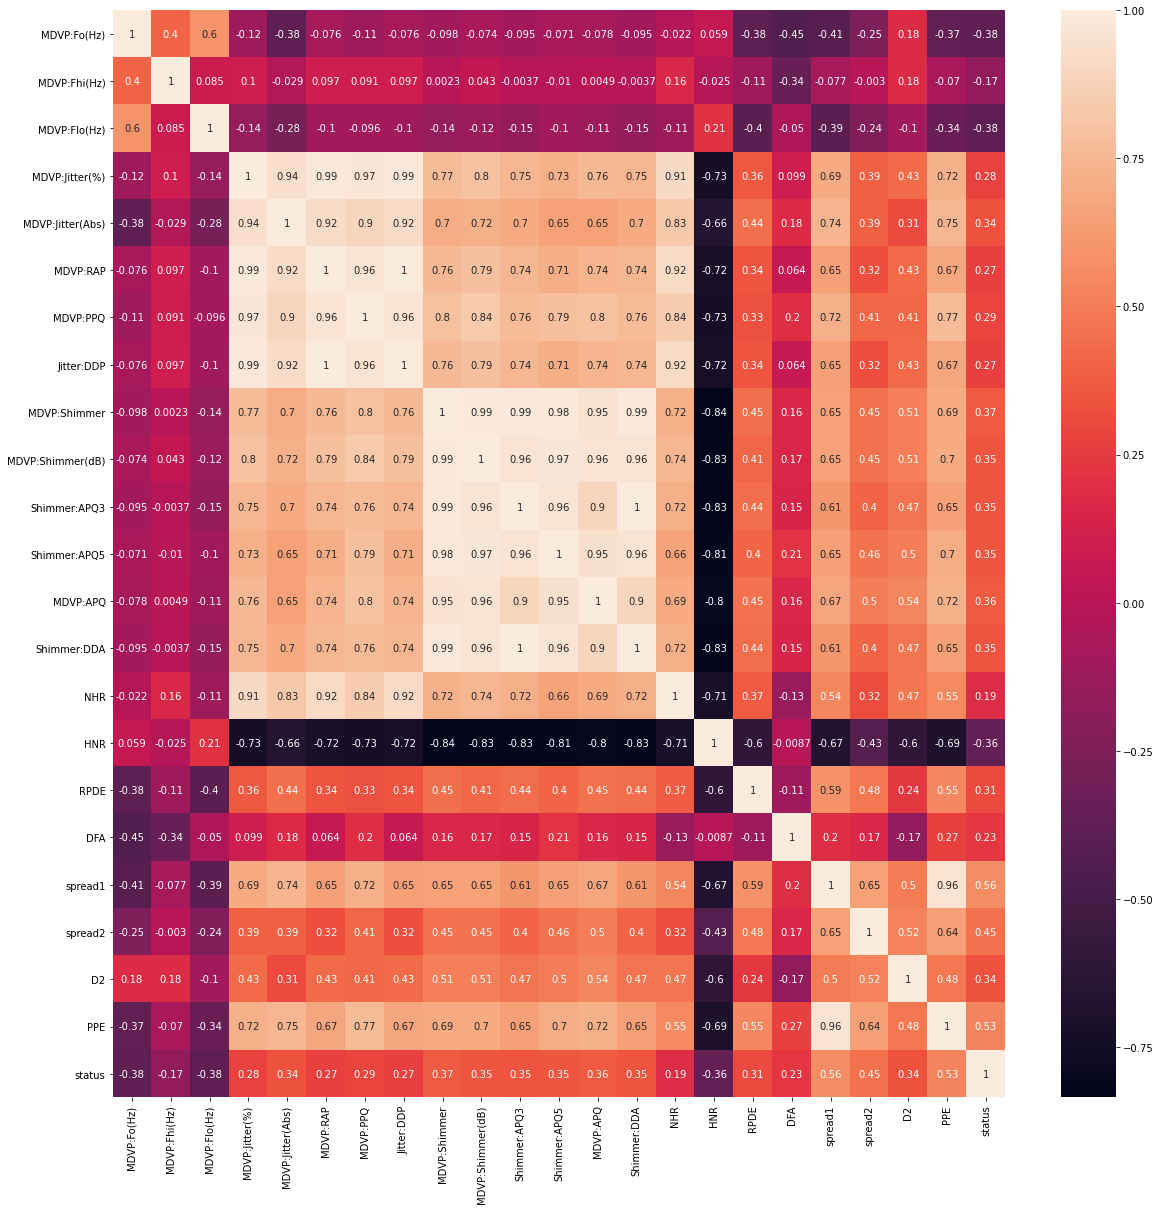

In [11]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), annot= True)

**Data Preprocessing**

In [12]:
threshold = 0.8
corr_col = set() # Set of all the names of deleted columns
corr_matrix = data.corr()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in corr_col):
            colname = corr_matrix.columns[i] # getting the name of column
            corr_col.add(colname)
            if colname in data.columns:
                del data[colname] # deleting the column from the dataset
print (data.shape)

(195, 13)


*Deleting the Columns which are highly correlated above "0.8"*

In [13]:
skewed_columns=[]
for i in data:
    if data[i].dtypes == 'float64' or data[i].dtypes == 'int64':
        if data[i].skew() > 1 or data[i].skew() <-1: 
            #print ('{} >> {}'.format(i,data[i].skew()))
            skewed_columns.append(i)
print (skewed_columns)

['MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Shimmer', 'status']


C:\Users\1027502\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


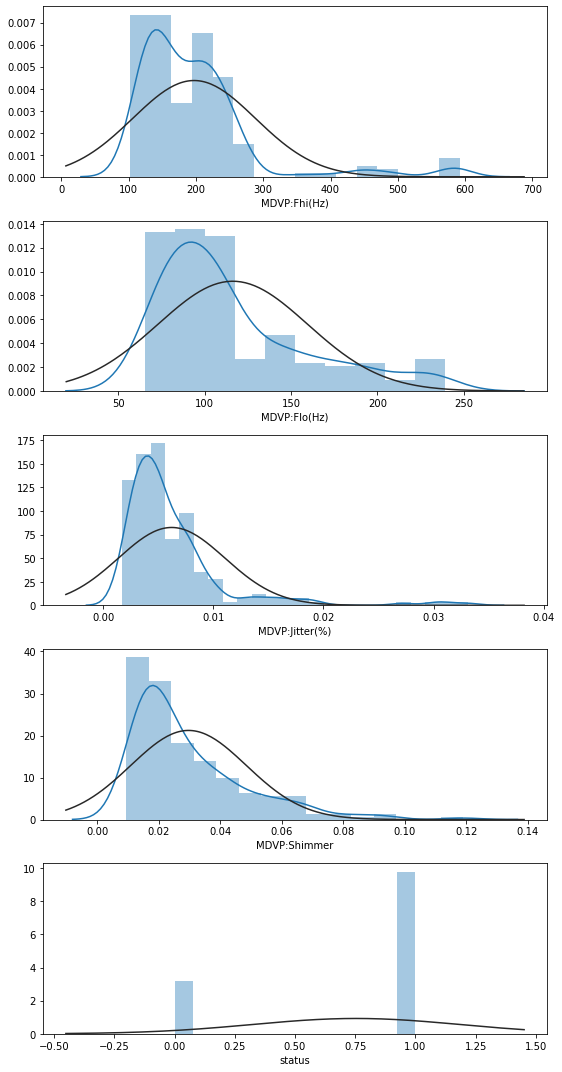

In [14]:
fig,axes=plt.subplots(len(skewed_columns),1,figsize=(8,15))
axes=axes.flatten()
j=0
for i in data:
    if i in skewed_columns:
        sns.distplot(data[i],ax=axes[j], fit = norm)
        j = j+1
plt.tight_layout()
plt.show()    

*Verifying the data with respect to skewness*

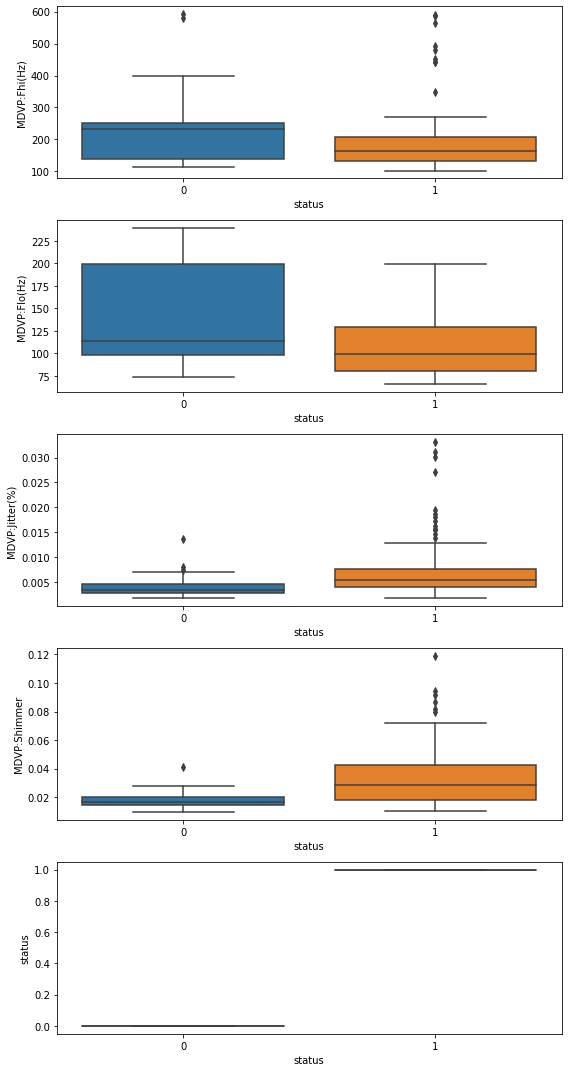

In [15]:
fig,axes=plt.subplots(len(skewed_columns),1,figsize=(8,15))
axes=axes.flatten()
j=0
for i in data:    
    if i in skewed_columns:
        #print ('skewed values are {}'.format(i))
        sns.boxplot(x='status',y= i,data=data,ax=axes[j])
        j = j+1
        
plt.tight_layout()
plt.show()

*Plotting the boxplot to verify the outliers*

In [16]:
data=data.drop(['name'], axis =1)

*As the "Name" column has no significance we dropped the "Name" data.*

In [17]:
for i in data:
    if i in skewed_columns and i != 'status':
        
        sorted(data[i])
        Q1=data[i].quantile(0.25)
        Q3=data[i].quantile(0.75)
        #print (Q1)
        #print(Q3)
        IQR=Q3-Q1
        #print (IQR)
        #print ('{} > {}'.format(i, ))
        data[i] = data[~((data[i] < (Q1 - 1.5 * IQR)) |(data[i] > (Q3 + 1.5 * IQR)))]
        #print(data[i])
#print(data)


*Calculating the IQR range and removing the outliers using Boxplot*

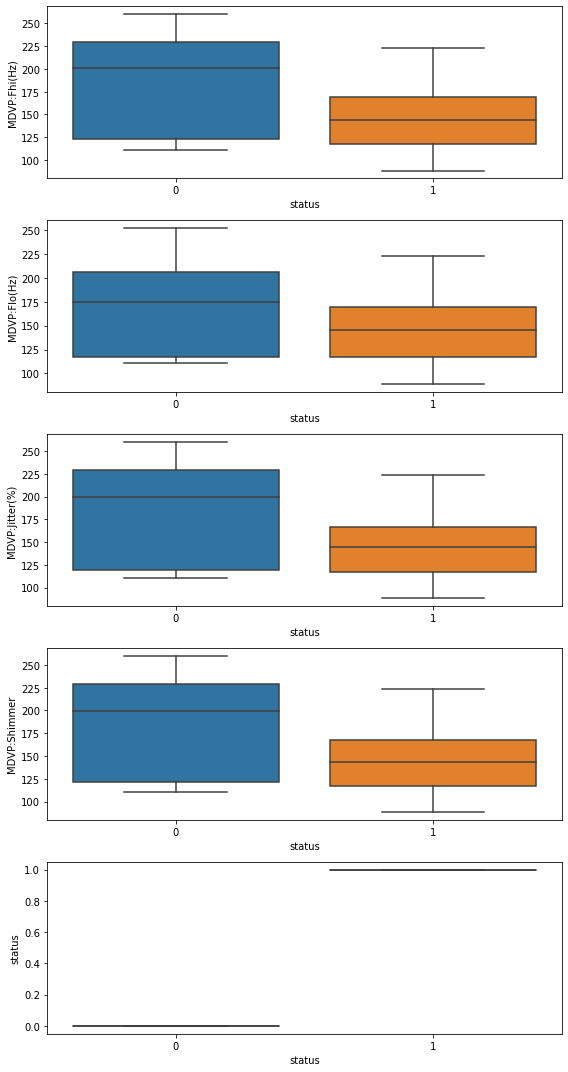

In [18]:
fig,axes=plt.subplots(len(skewed_columns),1,figsize=(8,15))
axes=axes.flatten()
j=0
for i in data:
    
    if i in skewed_columns:
        #print ('skewed values are {}'.format(i))
        sns.boxplot(x='status',y= i,data=data,ax=axes[j])
        j = j+1
        
plt.tight_layout()
plt.show()

*Validating the outliers after performing the IQR technique*

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MDVP:Fo(Hz)     195 non-null    float64
 1   MDVP:Fhi(Hz)    184 non-null    float64
 2   MDVP:Flo(Hz)    186 non-null    float64
 3   MDVP:Jitter(%)  181 non-null    float64
 4   MDVP:Shimmer    187 non-null    float64
 5   HNR             195 non-null    float64
 6   RPDE            195 non-null    float64
 7   DFA             195 non-null    float64
 8   spread1         195 non-null    float64
 9   spread2         195 non-null    float64
 10  D2              195 non-null    float64
 11  status          195 non-null    int64  
dtypes: float64(11), int64(1)
memory usage: 18.4 KB


*Validating the count of Null values in each column*

In [20]:
Null_value_columns = data.columns[data.isnull().any()]

In [21]:
for i in Null_value_columns: 
    print (i)
    data[i] = data[i].fillna(data[i].mean())
    data[i] = data[i].astype(float)
    

MDVP:Fhi(Hz)
MDVP:Flo(Hz)
MDVP:Jitter(%)
MDVP:Shimmer


*Filling the "Null" with its mean value as the data is of numerical*

In [22]:
data.isnull().sum()

MDVP:Fo(Hz)       0
MDVP:Fhi(Hz)      0
MDVP:Flo(Hz)      0
MDVP:Jitter(%)    0
MDVP:Shimmer      0
HNR               0
RPDE              0
DFA               0
spread1           0
spread2           0
D2                0
status            0
dtype: int64

In [23]:
data['status'].value_counts()
target = data['status']

*Finding if the data is balanced in regards with Target class*

In [24]:
X = data.drop(['status'], axis =1)
y = target

print('Size of X =', X.shape)
print('Size of y =', y.shape)

Size of X = (195, 11)
Size of y = (195,)


*Differentiating the data between the Independent and Dependent Variable(Target Class)*

In [25]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

*Performing the Standard Scaler to balacnce the Target Class*

**Splitting given data to Train & Test Dataset**

In [26]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.4, random_state=4)

print('Size of X_train =', X_train.shape)
print('Size of X_test =', X_test.shape)
print('Size of y_train =', y_train.shape)
print('Size of y_test =', y_test.shape)

Size of X_train = (117, 11)
Size of X_test = (78, 11)
Size of y_train = (117,)
Size of y_test = (78,)


**Modelling & Evaluating data using KNN Algorithm**

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn import metrics
#Train Model and Predict
k = 25
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
Pred_y = neigh.predict(X_test)
cm=confusion_matrix(y_test, Pred_y)
print('---------------------')
print("Confusion Matrix is: ")
print(cm)
print('---------------------')
print("Accuracy of model at K= {} is {}".format(k,metrics.accuracy_score(y_test, Pred_y)))
print('-------------------------------------------------')


---------------------
Confusion Matrix is: 
[[ 7  9]
 [ 1 61]]
---------------------
Accuracy of model at K= 25 is 0.8717948717948718
-------------------------------------------------


Minimum error:- 0.05128205128205128 at K = 5


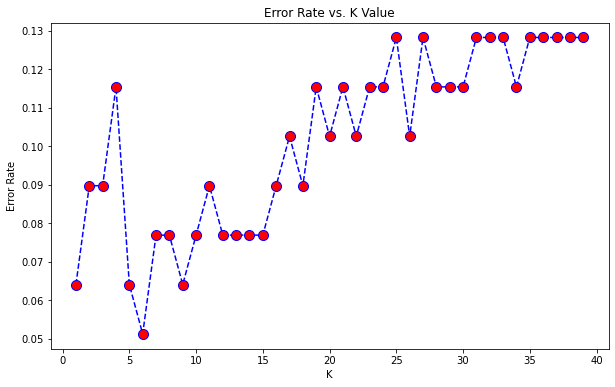

In [28]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))



*Plotting the graph between Error Rate vs. K Value*

Maximum accuracy:- 0.9487179487179487 at K = 5
-------------------------------------------------


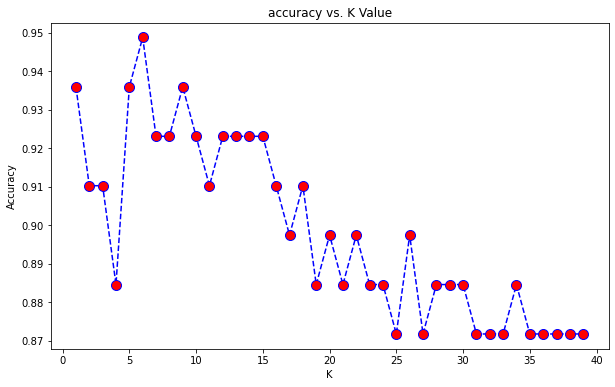

In [29]:
acc = []
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))
print('-------------------------------------------------')

*Plotting the graph between Accuracy vs. K Value*